In [3]:
# HOME
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
# use seaborn plotting defaults
import seaborn as sns; sns.set()


# get the code
import sys
sys.path.append('../codeCNV')
from plot import plot_snp

home = '/Users/mahtin'
# home = '/Users/martinscience'
# standard paths
testdata = os.path.join(home,"Dropbox/Icke/Work/somVar/testdata")
static_path = os.path.join(home, "Dropbox/Icke/Work/static")
cluster_path = os.path.join(home, "mount")
tooldata = os.path.join(home, "Dropbox/Icke/Work/somVar/tooldata")

# tool-specific paths
shell_path = "../shell"
# 
cnvdata = os.path.join(tooldata, "myCNVdata")
output_path = os.path.join(cnvdata, "output")

# the path to the input data
cnv_path = os.path.join(cnvdata, "cnv")
cnvPON_path = cnv_path = os.path.join(cnvdata, "chromCov")
cnv_path = os.path.join(cluster_path, "scratch/develop/PONcoverage/cnv")
cnvPON_path = os.path.join(cluster_path, "scratch/develop/PONcoverage/chromCov")

In [4]:
cnvPON_path

'/Users/mahtin/mount/scratch/develop/PONcoverage/chromCov'

## get the coverage and SNP data

In [5]:
sample = "01_A"
snp_df = pd.read_csv(os.path.join(output_path, f'rollingCNV/{sample}.snp.csv'), sep='\t')

In [6]:
snp_df = snp_df.dropna()
snp_df

,Chr,Pos,FullExonPos,ExonPos,log2ratio,log2ratiomean,log2ratiomeanDiff,Depth,EBscore,VAF,absVAF,deltaVAF,absVAFmean,absVAFmeanDiff,VAFstd,VAFstdDiff,deltaVAFvar,deltaVAFvarDiff,deltaVAFstd,deltaVAFstdDiff
18,chr1,1054900,37368,37368,-0.069236,0.346636,3.945632e-03,147.0,0.044,0.421769,0.156462,0.056079,0.310983,0.0,0.178631,0.0,0.042368,0.0,0.205834,0.0
19,chr1,1055000,37468,37468,-0.066106,0.346110,3.457801e-03,98.0,0.919,0.489796,0.020408,0.068027,0.310983,0.0,0.178631,0.0,0.042368,0.0,0.205834,0.0
20,chr1,1055037,37505,37505,-0.031916,0.346188,3.524551e-03,86.0,0.840,0.476744,0.046512,0.013052,0.310983,0.0,0.178631,0.0,0.042368,0.0,0.205834,0.0
21,chr1,1071823,37706,37706,0.337613,0.346937,3.793557e-03,109.0,0.007,0.532110,0.064220,0.055366,0.310983,0.0,0.178631,0.0,0.042368,0.0,0.205834,0.0
22,chr1,1291377,55139,55139,0.242629,0.247084,8.714793e-10,182.0,1.818,0.445055,0.109890,0.087055,0.310983,0.0,0.178631,0.0,0.042368,0.0,0.205834,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24165,chrX,156023260,49469650,1835187,-0.667568,0.212712,0.000000e+00,25.0,0.950,0.880000,0.760000,0.023226,0.155058,0.0,0.141056,0.0,0.015260,0.0,0.123530,0.0
24166,chrX,156023266,49469656,1835193,-0.655721,0.212684,0.000000e+00,25.0,0.930,0.880000,0.760000,0.000000,0.155058,0.0,0.141056,0.0,0.015260,0.0,0.123530,0.0
24167,chrX,156024203,49469886,1835423,0.148033,0.211628,0.000000e+00,53.0,0.392,0.132075,0.735850,0.747925,0.155058,0.0,0.141056,0.0,0.015260,0.0,0.123530,0.0
24168,chrX,156024239,49469922,1835459,0.160322,0.211463,0.000000e+00,56.0,0.203,0.267857,0.464286,0.135782,0.155058,0.0,0.141056,0.0,0.015260,0.0,0.123530,0.0


## clustering strategy

+ #### try removing the main cluster using GMM / or adding the cluster label to the parameters
+ #### creating a visualisation for clusters on genomic data
+ #### try half-maximum cutoff for all metrices

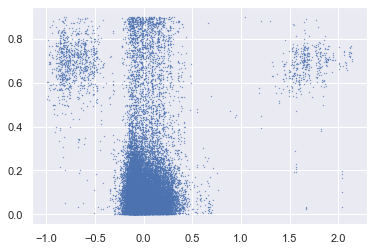

In [7]:
plt.scatter(snp_df['log2ratiomean'], snp_df['absVAF'], s=.1);

### DBSCAN

In [8]:
24000 / 200

120.0

ep:0.1|min_samples:24>> 3 clusters | cluster0: 22629


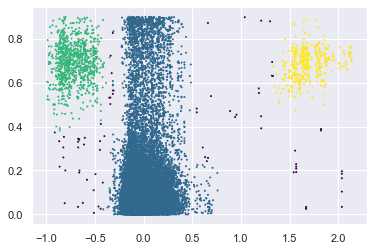

In [12]:
from sklearn.cluster import DBSCAN

# get the matrix
allcols = ['log2ratiomean', 'VAF', 'absVAF', 'deltaVAFstd', 'deltaVAFvar', 'VAFstd']
select_cols = ['log2ratiomean', 'absVAF', 'deltaVAFvar']
X = snp_df[select_cols]
rows = X.shape[0]

ep=0.1
ms = int(rows/1000)

labels = DBSCAN(eps=ep, min_samples=ms).fit_predict(X)
plt.scatter(X['log2ratiomean'], X['absVAF'], c=labels, s=1, cmap='viridis')
cluster, counts = np.unique(labels, return_counts=True)
cluster_count = len(cluster[cluster != -1])
cluster_size = counts[np.argmax(counts)]
cluster_id = cluster[np.argmax(counts)]
print(f"ep:{round(ep,2)}|min_samples:{ms}>> {cluster_count} clusters | cluster{cluster_id}: {cluster_size}")

### loading labels back into df

In [14]:
snp_df['dbscan'] = labels
snp_df

,Chr,Pos,FullExonPos,ExonPos,log2ratio,log2ratiomean,log2ratiomeanDiff,Depth,EBscore,VAF,absVAF,deltaVAF,absVAFmean,absVAFmeanDiff,VAFstd,VAFstdDiff,deltaVAFvar,deltaVAFvarDiff,deltaVAFstd,deltaVAFstdDiff,dbscan
18,chr1,1054900,37368,37368,-0.069236,0.346636,3.945632e-03,147.0,0.044,0.421769,0.156462,0.056079,0.310983,0.0,0.178631,0.0,0.042368,0.0,0.205834,0.0,0
19,chr1,1055000,37468,37468,-0.066106,0.346110,3.457801e-03,98.0,0.919,0.489796,0.020408,0.068027,0.310983,0.0,0.178631,0.0,0.042368,0.0,0.205834,0.0,0
20,chr1,1055037,37505,37505,-0.031916,0.346188,3.524551e-03,86.0,0.840,0.476744,0.046512,0.013052,0.310983,0.0,0.178631,0.0,0.042368,0.0,0.205834,0.0,0
21,chr1,1071823,37706,37706,0.337613,0.346937,3.793557e-03,109.0,0.007,0.532110,0.064220,0.055366,0.310983,0.0,0.178631,0.0,0.042368,0.0,0.205834,0.0,0
22,chr1,1291377,55139,55139,0.242629,0.247084,8.714793e-10,182.0,1.818,0.445055,0.109890,0.087055,0.310983,0.0,0.178631,0.0,0.042368,0.0,0.205834,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24165,chrX,156023260,49469650,1835187,-0.667568,0.212712,0.000000e+00,25.0,0.950,0.880000,0.760000,0.023226,0.155058,0.0,0.141056,0.0,0.015260,0.0,0.123530,0.0,0
24166,chrX,156023266,49469656,1835193,-0.655721,0.212684,0.000000e+00,25.0,0.930,0.880000,0.760000,0.000000,0.155058,0.0,0.141056,0.0,0.015260,0.0,0.123530,0.0,0
24167,chrX,156024203,49469886,1835423,0.148033,0.211628,0.000000e+00,53.0,0.392,0.132075,0.735850,0.747925,0.155058,0.0,0.141056,0.0,0.015260,0.0,0.123530,0.0,0
24168,chrX,156024239,49469922,1835459,0.160322,0.211463,0.000000e+00,56.0,0.203,0.267857,0.464286,0.135782,0.155058,0.0,0.141056,0.0,0.015260,0.0,0.123530,0.0,0


In [15]:
snp_df.to_csv(os.path.join(output_path, f'cluster/{sample}.dbscan.csv'), sep='\t', index=False)

In [ ]:
counts[np.argmax(counts)]

+ #### DBSCAN seems to be best fitted for removing the center mass as the spread is hard to guess
    * perform a grid search on eps and min_samples to find the maximum center mass with just one cluster
    * better!: perform this grid search on multi-dimensional data

In [ ]:
def fit_DBSCAN(X, max_cluster=1, eps=np.logspace(-1,1,10), sample_fracs=np.logspace(-3,-1,10)):
    max_counts = 0
    for sample_frac in sample_fracs:
        for ep in eps:
            # sample_fraction up to all samples if wanted
            ms = min(X.shape[0], int(X.shape[0] * sample_frac))
            model = DBSCAN(eps=ep, min_samples=ms)
            labels = model.fit_predict(X)
            cluster, counts = np.unique(labels, return_counts=True)
            # get the number of clusters 
            cluster_count = len(cluster[cluster != -1])
            # get the size of cluster 0
            #! maybe use better with largest cluster
            cluster_size = counts[np.argmax(counts)]
            if cluster_count:
                if cluster_size > max_counts:
                    best_model = model
                    print(f"Best model: ep:{round(ep,2)}|min_samples:{ms}>> {cluster_count} clusters | cluster0: {cluster_size}")
                    if (cluster_count <= max_cluster):
                        best_limit_model = model      
                        print(f"BEST model: ep:{round(ep,2)}|min_samples:{ms}>> {cluster_count} clusters | cluster0: {cluster_size}")
    return best_model, best_limit_model

In [ ]:
best_model, best_limit_model = fit_DBSCAN(X, max_cluster=1)

In [ ]:
labels = best_model.fit_predict(X)
plt.scatter(X['log2ratiomean'], X['absVAF'], c=labels, s=1, cmap='viridis')

In [ ]:
np.unique(labels)

In [ ]:
labels = best_limit_model.fit_predict(X)
plt.scatter(X['log2ratiomean'], X['absVAF'], c=labels, s=1, cmap='viridis')

In [ ]:
np.unique(labels)

In [ ]:
snp_df['DBID'] = labels
snp_df

In [ ]:
cnv_df = snp_df.query('DBID > 0')
cnv_df

In [ ]:
fig_params = dict(
    figsize=(24,8),
    colormap='coolwarm_r',
    color_chroms=True,
    ylim=(0,1),
    cov_offset=.1,  # how much log2ratio=0 is shifted above SNP-data
    cov_height=.5,
    label_size=13
)

log2 = dict(
        title='log2ratio',
        plot_type='scatter',   # ['line', 'scatter']
        data='log2ratio',
        plot_args=dict(
            linewidth=0.3,
            color='black',
            s=0.2,
            alpha=.7
        )
    )

log2mean = dict(
        title='rollinglog2ratio',
        plot_type='line',   # ['line', 'scatter']
        data='log2ratiomean',
        plot_args=dict(
            linewidth=1,
            color='yellow',
            alpha=.7
        )
    )

absvaf = dict(
        title='absVAF',
        plot_type='scatter',  # ['line', 'scatter']
        data='absVAF',
        cluster={'DBID', 'blue'}
        plot_args=dict(
            s=1,
            c=snp_df.query('Chr in @chroms')['DBID'],
            alpha=.7
        )
    )

chroms = ['chr5', 'chr7','chr8', 'chr11', 'chr17']
r1 = 'chr17:3Mb-9Mb'

fig, ax, df, chrom_df = plot_snp(snp_df, snp_plots=[absvaf], cov_plots=[log2, log2mean], chroms=chroms, region='', **fig_params)

+ #### GMM clustering runs best for fitting the center mass
    * clusters vary depending on init clusters

In [ ]:
from sklearn.mixture import GaussianMixture as GMM

X = merge[['log2ratiomean', 'VAF']]
X
choice = range(5)
fig, axes = plt.subplots(1, len(choice), figsize=(20,5))
for i, components in enumerate(choice):
    gmm = GMM(n_components=3, covariance_type='diag', n_init=2)
    labels = gmm.fit_predict(X)
    _, counts = np.unique(labels, return_counts=True)
    print(np.max(counts))
    _ = axes[i].scatter(X['log2ratiomean'], X['VAF'], c=labels, s=1)
    # print(f'{components} components - AIC:', gmm.aic(X))
    # print(f'{components} components - BIC:', gmm.bic(X))

+ increasing n_init to 20 does the job:

In [ ]:
choice = range(5)
fig, axes = plt.subplots(1, len(choice), figsize=(20,5))
for i, components in enumerate(choice):
    gmm = GMM(n_components=3, covariance_type='diag', n_init=25)
    labels = gmm.fit_predict(X)
    _, counts = np.unique(labels, return_counts=True)
    print(np.max(counts))
    _ = axes[i].scatter(X['log2ratiomean'], X['VAF'], c=labels, s=1)
    # print(f'{components} components - AIC:', gmm.aic(X))
    # print(f'{components} components - BIC:', gmm.bic(X))

+ get_centers computes the means from the best fit centers

In [ ]:
from sklearn.mixture import GaussianMixture as GMM

def get_centers(merge_df, runs=25, comps=3, VAF_limits=(0.05, 0.95), exclude_X=True):
    '''
    use GMM to identify the center cluster and get the means from that
    because GMM occasionally does not identify the center cluster,
    I let the GMM proceed several times and minimize the center cluster
    next, the center cluster can be identified as the maximum center
    '''
    VAFmin, VAFmax = VAF_limits
    # fit the centers to the data 
    if exclude_X:
        merge_df = merge_df.query('Chr != "chrX"')     
    X = merge_df.query('@VAFmin < VAF < @VAFmax and log2ratiomean == log2ratiomean')[['log2ratiomean', 'VAF']]

    gmm = GMM(n_components=comps, covariance_type='diag', n_init=runs).fit(X)
    labels = gmm.predict(X)
    # get the size of the 
    _, counts = np.unique(labels, return_counts=True)
    maxcount = np.max(counts)
    centers = pd.DataFrame(gmm.means_, columns=['log2ratio', 'VAF'])
    # get mean_cov and meanVAF from largest cluster
    meanCov, meanVAF = centers.loc[np.argmax(counts)]
    size = maxcount
            
    print(f'GMM using {runs} inits: center size {size} meanVAF = {round(meanVAF, 2)} meanCov={round(meanCov, 2)}')
    
    return meanCov, meanVAF, centers

In [ ]:
meanCov, meanVAF, centers = get_centers(merge)
meanVAF